KeyboardInterrupt: 

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = r"C:\Users\anany\OneDrive\Desktop\ARECANUT\train"
validation_dir = r"C:\Users\anany\OneDrive\Desktop\ARECANUT\validation"


train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  
    batch_size=32,
    class_mode='categorical' 
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 1981 images belonging to 3 classes.
Found 297 images belonging to 3 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),  # Reduces the dimensions to (None, N)
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Matches the number of categories
])

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Learning Rate Scheduler
def lr_scheduler(epoch, lr):
    return lr * 0.95  # Reduce learning rate by 5% every epoch

callbacks = [early_stopping, LearningRateScheduler(lr_scheduler)]

# Add callbacks to model.fit
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=40,
    callbacks=callbacks
)

Epoch 1/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 437s 7s/step - accuracy: 0.3959 - loss: 1.1097 - val_accuracy: 0.3636 - val_loss: 1.0363 - learning_rate: 9.5000e-04
Epoch 2/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 397s 6s/step - accuracy: 0.4813 - loss: 1.0057 - val_accuracy: 0.3670 - val_loss: 0.9920 - learning_rate: 9.0250e-04
Epoch 3/40
36/62 ━━━━━━━━━━━━━━━━━━━━ 1:29 3s/step - accuracy: 0.5560 - loss: 0.9463

KeyboardInterrupt: 

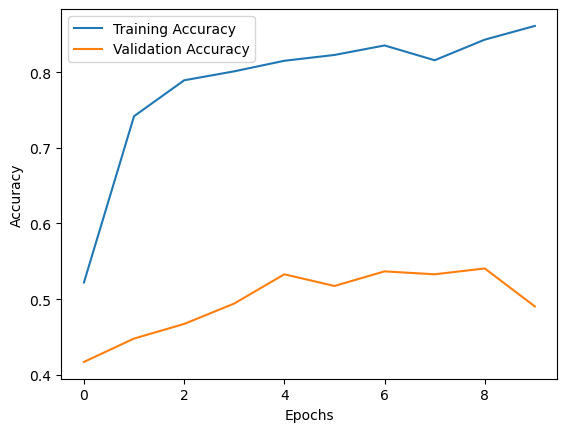

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
model.save('arecanut_cnn_model.h5')

In [10]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_acc:.2f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4896 - loss: 1.7068
Test Accuracy: 0.49


In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"C:\Users\anany\OneDrive\Desktop\ARECANUT\test\WhatsApp Image 2024-12-08 at 10.10.37_496e290d.jpg"
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0  
img_array = np.expand_dims(img_array, axis=0) 

predictions = model.predict(img_array)
class_indices = train_generator.class_indices
categories = {v: k for k, v in class_indices.items()}

for category, score in zip(categories.values(), predictions[0]):
    print(f"{category}: {score:.2%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Bette: 97.08%
Gotu: 2.60%
Kole: 0.32%
